In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

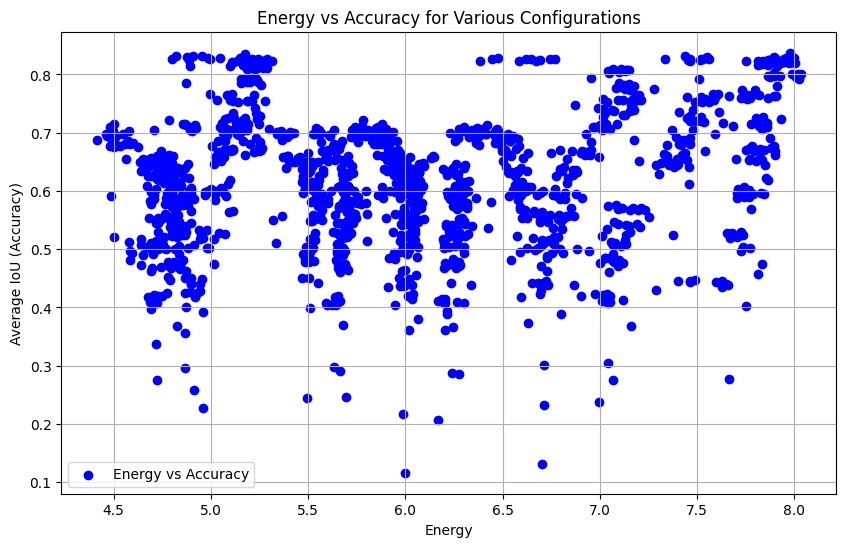

In [3]:
# Load the CSV files
accuracy_df = pd.read_csv('accuracy.csv')  # File containing "Average IoU"
energy_files = ['1_5ghz-1.csv', '1_8ghz-1.csv', '2_1ghz-1.csv', '2_4ghz-1.csv']  # Energy files

# Merge all energy files into one DataFrame
energy_df = pd.concat([pd.read_csv(f) for f in energy_files], ignore_index=True)

# Merge the accuracy and energy data on common columns
merged_df = pd.merge(accuracy_df, energy_df, on=["Frequency", "Filter", "Threshold", "Frame Bitrate"])
merged_df = merged_df.drop(columns=['FPS', 'Start Time', 'End Time'])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Avg Energy'], merged_df['Average IoU'], color='b', label='Energy vs Accuracy')

# Labels and title
plt.xlabel('Energy')
plt.ylabel('Average IoU (Accuracy)')
plt.title('Energy vs Accuracy for Various Configurations')

# Add grid and show the plot
plt.grid(True)
plt.legend()
plt.show()

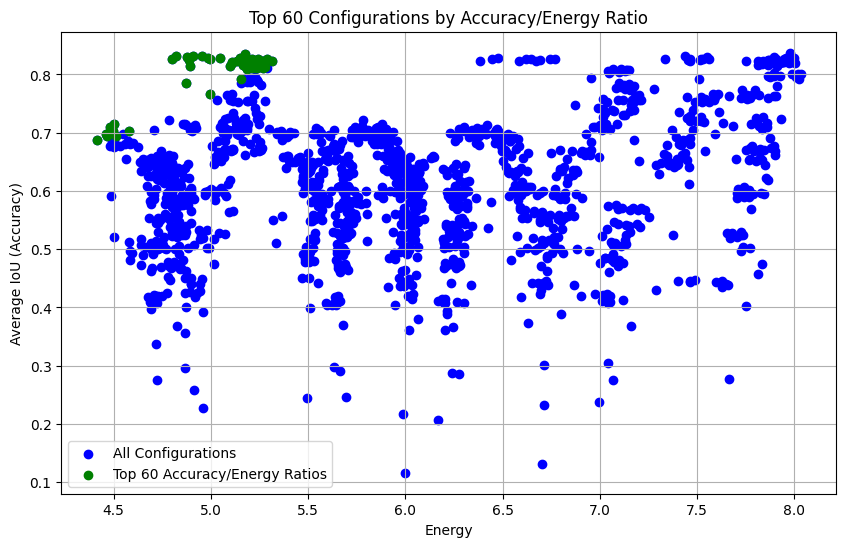

Top 60 Configurations by Accuracy/Energy Ratio:


,Frequency,Filter,Threshold,Frame Bitrate,Average IoU,Avg Energy,Accuracy to Energy Ratio
252,1.5,pixel,0.0000,3000,0.8310,4.818542,0.172459
245,1.5,pixel,0.0000,1000,0.8260,4.801466,0.172031
243,1.5,pixel,0.0000,400,0.8297,4.879438,0.170040
246,1.5,pixel,0.0000,1300,0.8312,4.906838,0.169396
250,1.5,pixel,0.0000,2400,0.8255,4.887200,0.168911
251,1.5,pixel,0.0000,2700,0.8321,4.952780,0.168007
244,1.5,pixel,0.0000,700,0.8138,4.891927,0.166356
249,1.5,pixel,0.0000,2100,0.8276,4.986178,0.165979
247,1.5,pixel,0.0000,1600,0.8271,4.994458,0.165604
248,1.5,pixel,0.0000,1900,0.8275,5.048415,0.163913


In [4]:
# Calculate the accuracy/energy ratio
merged_df['Accuracy to Energy Ratio'] = merged_df['Average IoU'] / merged_df['Avg Energy']

# Get the top k configurations by Accuracy to Energy Ratio
k = 60  # Change this to the number of configurations you want
top_k_df = merged_df.nlargest(k, 'Accuracy to Energy Ratio')

# Plotting the full dataset
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Avg Energy'], merged_df['Average IoU'], color='b', label='All Configurations')

# Plot the top k configurations
plt.scatter(top_k_df['Avg Energy'], top_k_df['Average IoU'], color='g', label=f'Top {k} Accuracy/Energy Ratios')

# Labels and title
plt.xlabel('Energy')
plt.ylabel('Average IoU (Accuracy)')
plt.title(f'Top {k} Configurations by Accuracy/Energy Ratio')

# Add grid and show the plot
plt.grid(True)
plt.legend()
plt.show()

# Output the top k configurations
print(f"Top {k} Configurations by Accuracy/Energy Ratio:")
top_k_df

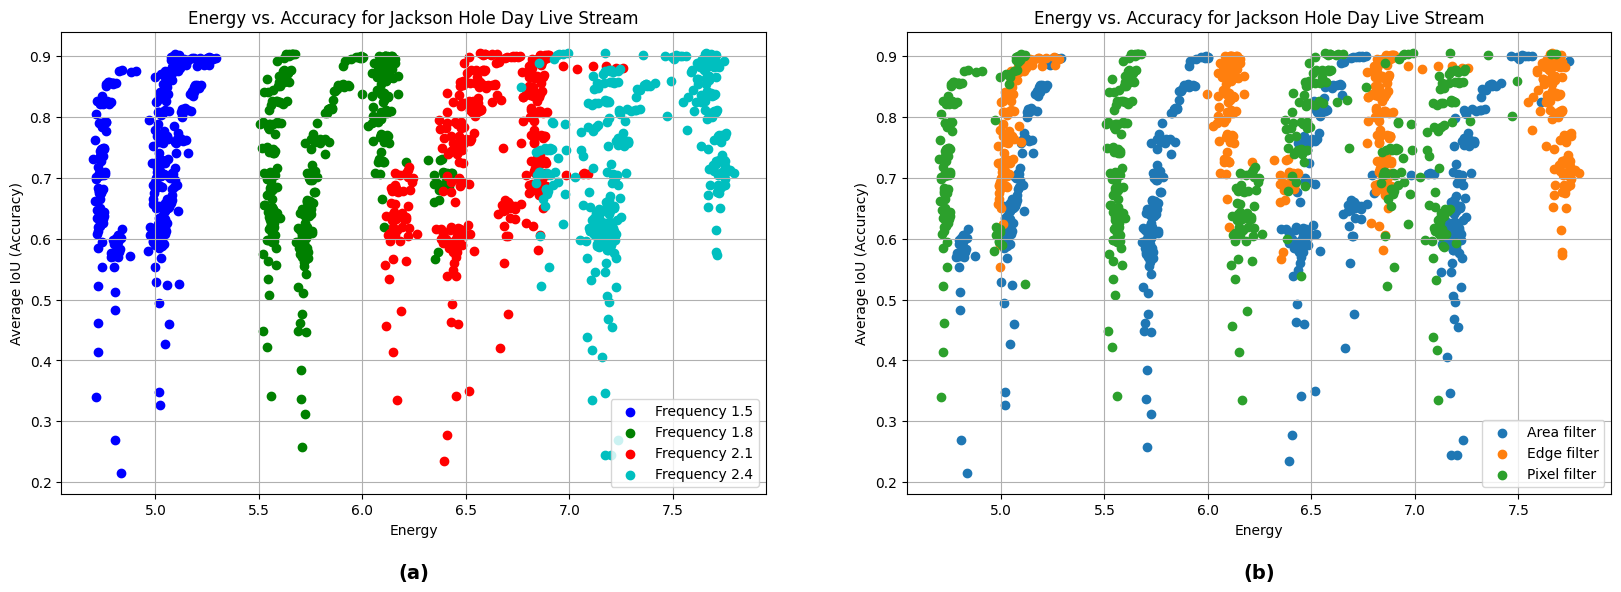

In [5]:
# Load the CSV files
accuracy_df = pd.read_csv('accuracy-JH-1.csv')  # File containing "Average IoU"
energy_files = ['energy-JH-1.csv']  # Energy files

# Merge all energy files into one DataFrame
energy_df = pd.concat([pd.read_csv(f) for f in energy_files], ignore_index=True)

# Merge the accuracy and energy data on common columns
merged_df = pd.merge(accuracy_df, energy_df, on=["Frequency", "Filter", "Threshold", "Frame Bitrate"])
merged_df = merged_df.drop(columns=['FPS', 'Start Time', 'End Time'])

# Create a figure and axis
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(20, 6))

colors = ['b', 'g', 'r', 'c']  # Adjust/add more colors if needed

# Plot each frequency as a different color
for i, (frequency, group) in enumerate(merged_df.groupby('Frequency')):
    ax.scatter(group['Avg Energy'], group['Average IoU'], 
               color=colors[i % len(colors)], label=f'Frequency {frequency}')

# Labels and title
ax.set_xlabel('Energy')
ax.set_ylabel('Average IoU (Accuracy)')
ax.set_title('Energy vs. Accuracy for Jackson Hole Day Live Stream')

# Add grid and legend
ax.grid(True)
ax.legend()

for i, (filter, group) in enumerate(merged_df.groupby('Filter')):
    ax2.scatter(group['Avg Energy'], group['Average IoU'], label=f'{filter.capitalize()} filter')

# Labels and title
ax2.set_xlabel('Energy')
ax2.set_ylabel('Average IoU (Accuracy)')
ax2.set_title('Energy vs. Accuracy for Jackson Hole Day Live Stream')

# Add grid and show the plot
ax2.grid(True)
ax2.legend()

# Add labels below each subplot
labels = [r'(a)', r'(b)', r'(c)', r'(d)']
positions = [(0.5, -0.15)] * 4  # Centered below each subplot
for ax, label, pos in zip([ax,ax2], labels, positions):
    ax.text(pos[0], pos[1], label, transform=ax.transAxes, weight='bold', fontsize=14, ha='center', va='top')

plt.show()

# Show the plot
# plt.show()

In [6]:
import numpy as np

def get_lowest_energy_configuration_for_accuracy(df, accuracy_threshold):
    # Filter for rows where Average IoU (accuracy) is equal to or greater than the specified threshold
    filtered_df = df[df['Average IoU'] >= accuracy_threshold]
    
    # If there are no rows that meet the accuracy threshold, return None
    if filtered_df.empty:
        return None
    
    # Find the row with the minimum energy value in the filtered DataFrame
    min_energy_row = filtered_df.loc[filtered_df['Avg Energy'].idxmin()]
    
    # Return only the configuration details along with energy and accuracy
    configuration = min_energy_row[['Frequency', 'Filter', 'Threshold', 'Frame Bitrate', 'Avg Energy', 'Average IoU']]
    return configuration

# Example usage with accuracy threshold of 0.8
accuracy_threshold = 0.905
config_thresh_df = pd.DataFrame(columns=['Frequency', 'Filter', 'Threshold', 'Frame Bitrate', 'Avg Energy', 'Average IoU', 'Accuracy Threshold'])

for thresh in np.arange(0.70, 0.91, 0.01):
    lowest_energy_configuration = get_lowest_energy_configuration_for_accuracy(merged_df, thresh)
    if lowest_energy_configuration is None:
        continue
    lowest_energy_configuration['Accuracy Threshold'] = thresh
    config_thresh_df.loc[-1] = lowest_energy_configuration
    config_thresh_df.index = config_thresh_df.index + 1

config_thresh_df
# lowest_energy_configuration = get_lowest_energy_configuration_for_accuracy(merged_df, accuracy_threshold)

# if lowest_energy_configuration is not None:
#     print("Configuration with lowest energy for specified accuracy:")
#     print(lowest_energy_configuration)
# else:
#     print("No configuration found with the specified accuracy.")

,Frequency,Filter,Threshold,Frame Bitrate,Avg Energy,Average IoU,Accuracy Threshold
20,1.5,pixel,0.03,100,4.69967,0.731,0.7
19,1.5,pixel,0.03,100,4.69967,0.731,0.71
18,1.5,pixel,0.03,100,4.69967,0.731,0.72
17,1.5,pixel,0.03,100,4.69967,0.731,0.73
16,1.5,pixel,0.04,400,4.708,0.762,0.74
15,1.5,pixel,0.04,400,4.708,0.762,0.75
14,1.5,pixel,0.04,400,4.708,0.762,0.76
13,1.5,pixel,0.03,400,4.710882,0.8044,0.77
12,1.5,pixel,0.03,400,4.710882,0.8044,0.78
11,1.5,pixel,0.03,400,4.710882,0.8044,0.79


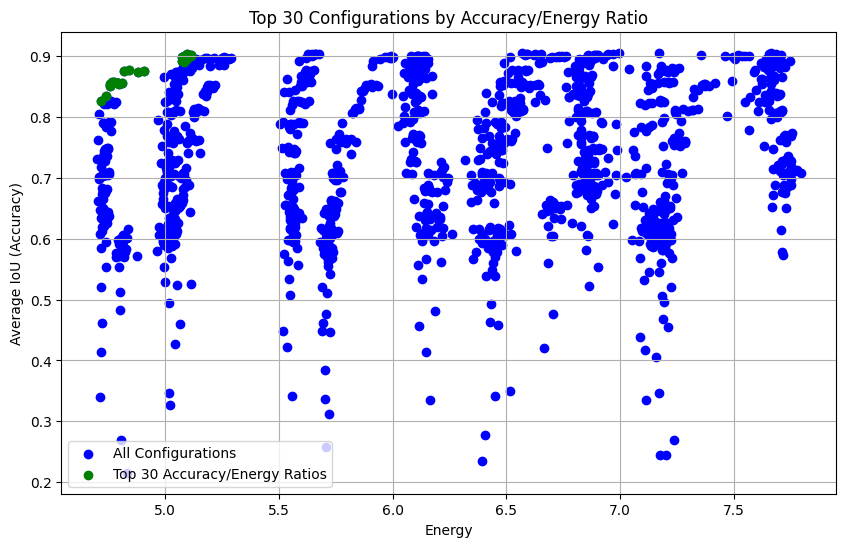

Top 30 Configurations by Accuracy/Energy Ratio:


,Frequency,Filter,Threshold,Frame Bitrate,Average IoU,Avg Energy,Accuracy to Energy Ratio
261,1.5,pixel,0.0100,2400,0.8756,4.821895,0.181588
263,1.5,pixel,0.0100,3000,0.8775,4.840198,0.181294
273,1.5,pixel,0.0200,2700,0.8577,4.769823,0.179818
274,1.5,pixel,0.0200,3000,0.8576,4.774741,0.179612
267,1.5,pixel,0.0200,1000,0.8538,4.760121,0.179365
260,1.5,pixel,0.0100,2100,0.8738,4.880211,0.179050
266,1.5,pixel,0.0200,700,0.8510,4.760728,0.178754
272,1.5,pixel,0.0200,2400,0.8563,4.791286,0.178720
271,1.5,pixel,0.0200,2100,0.8562,4.793042,0.178634
269,1.5,pixel,0.0200,1600,0.8565,4.796129,0.178582


In [7]:
# Calculate the accuracy/energy ratio
merged_df['Accuracy to Energy Ratio'] = merged_df['Average IoU'] / merged_df['Avg Energy']

# Get the top k configurations by Accuracy to Energy Ratio
k = 30  # Change this to the number of configurations you want
top_k_df = merged_df.nlargest(k, 'Accuracy to Energy Ratio')

# Plotting the full dataset
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Avg Energy'], merged_df['Average IoU'], color='b', label='All Configurations')

# Plot the top k configurations
plt.scatter(top_k_df['Avg Energy'], top_k_df['Average IoU'], color='g', label=f'Top {k} Accuracy/Energy Ratios')

# Labels and title
plt.xlabel('Energy')
plt.ylabel('Average IoU (Accuracy)')
plt.title(f'Top {k} Configurations by Accuracy/Energy Ratio')

# Add grid and show the plot
plt.grid(True)
plt.legend()
plt.show()

# Output the top k configurations
print(f"Top {k} Configurations by Accuracy/Energy Ratio:")
top_k_df

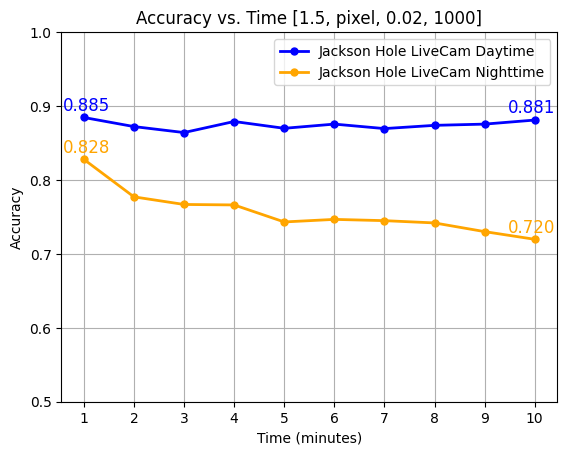

In [8]:
# Plot video accuracy over time for 1.5,pixel,0.02,1000

minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# JH_accuracy = [0.896891846652386, 0.8841147617895713, 0.8756257703281908, 
#             0.8838634526272898, 0.8764355769718852, 0.8770951794943822, 
#             0.8728595695022707, 0.8749113331430229, 0.8759406165094483, 
#             0.8801250754296973]
JH_acc_002_1000 = [0.8845323462455549, 0.8722245455799401, 0.8641256924805556,
               0.879087591472295, 0.8698817141980153, 0.8755619359253631,
               0.8695019954260023, 0.8738858139002347, 0.8755509400832433,
               0.881035014470993]

JH_night_acc_002_1000 = [0.8278939876485192, 0.777150069352838, 0.7668527398177784,
                     0.7662156447272866, 0.7431946317743635, 0.7466709707248023,
                    0.7449518610907384, 0.7418769200685303, 0.7301146976437243,
                    0.7197275938102095]

# Plotting
plt.figure()
plt.plot(minutes, JH_acc_002_1000, marker='o', color='b', linestyle='-', linewidth=2, markersize=5, label='Jackson Hole LiveCam Daytime')
plt.plot(minutes, JH_night_acc_002_1000, marker='o', color='orange', linestyle='-', linewidth=2, markersize=5, label='Jackson Hole LiveCam Nighttime')
plt.title('Accuracy vs. Time [1.5, pixel, 0.02, 1000]')
plt.xlabel('Time (minutes)')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.grid(True)
plt.xticks(minutes)  # Display minute intervals for clarity

plt.annotate(f"{JH_acc_002_1000[-1]:.3f}", (10, JH_acc_002_1000[-1]), textcoords="offset points", xytext=(-2,5), ha='center', fontsize=12, color='b')
plt.annotate(f"{JH_acc_002_1000[0]:.3f}", (1, JH_acc_002_1000[0]), textcoords="offset points", xytext=(2,5), ha='center', fontsize=12, color='b')

plt.annotate(f"{JH_night_acc_002_1000[-1]:.3f}", (10, JH_night_acc_002_1000[-1]), textcoords="offset points", xytext=(-2,5), ha='center', fontsize=12, color='orange')
plt.annotate(f"{JH_night_acc_002_1000[0]:.3f}", (1, JH_night_acc_002_1000[0]), textcoords="offset points", xytext=(2,5), ha='center', fontsize=12, color='orange')

plt.legend()
plt.show()

In [9]:
# Load the CSV files
accuracy_df = pd.read_csv('accuracy-JH-1.csv')
energy_df = pd.read_csv('energy-JH-1.csv')
num_frames_df = pd.read_csv('frame-count-JH.csv')

# Merge the accuracy and energy data on common columns
merged_df = pd.merge(accuracy_df, num_frames_df, on=["Frequency", "Filter", "Threshold", "Frame Bitrate"])
merged_df = pd.merge(merged_df, energy_df, on=["Frequency", "Filter", "Threshold", "Frame Bitrate"])
merged_df = merged_df.drop(columns=['FPS', 'Start Time', 'End Time'])

# merged_df = merged_df.loc[merged_df['Frequency'] == 2.4]

merged_df.loc[(merged_df['Frequency'] == 2.4) & (merged_df['Threshold'] == 0.01) & (merged_df['Frame Bitrate'] == 3000)]

,Frequency,Filter,Threshold,Frame Bitrate,Average IoU,Frame Count,Avg Energy
1110,2.4,area,0.01,3000,0.8554,821,7.414849
1352,2.4,pixel,0.01,3000,0.8785,1163,7.243491


In [10]:
import numpy as np

def get_lowest_frame_count_configuration_for_accuracy(df, accuracy_threshold):
    # Filter for rows where Average IoU (accuracy) is equal to or greater than the specified threshold
    filtered_df = df[df['Average IoU'] >= accuracy_threshold]
    
    # If there are no rows that meet the accuracy threshold, return None
    if filtered_df.empty:
        return None
    
    # Find the row with the minimum energy value in the filtered DataFrame
    min_energy_row = filtered_df.loc[filtered_df['Frame Count'].idxmin()]
    
    # Return only the configuration details along with energy and accuracy
    configuration = min_energy_row[['Frequency', 'Filter', 'Threshold', 'Frame Bitrate', 'Frame Count', 'Average IoU', 'Avg Energy']]
    return configuration

config_thresh_df = pd.DataFrame(columns=['Frequency', 'Filter', 'Threshold', 'Frame Bitrate', 'Frame Count', 'Average IoU', 'Accuracy Threshold', 'Avg Energy'])

for thresh in np.arange(0.70, 0.91, 0.01):
    lowest_energy_configuration = get_lowest_frame_count_configuration_for_accuracy(merged_df, thresh)
    if lowest_energy_configuration is None:
        continue
    lowest_energy_configuration['Accuracy Threshold'] = thresh
    config_thresh_df.loc[-1] = lowest_energy_configuration
    config_thresh_df.index = config_thresh_df.index + 1

config_thresh_df

,Frequency,Filter,Threshold,Frame Bitrate,Frame Count,Average IoU,Accuracy Threshold,Avg Energy
20,1.8,area,0.04,2700,132,0.7097,0.7,5.758444
19,1.8,area,0.04,2400,134,0.7121,0.71,5.768793
18,2.1,pixel,0.05,3000,223,0.749,0.72,6.384467
17,2.1,pixel,0.05,3000,223,0.749,0.73,6.384467
16,2.1,pixel,0.05,3000,223,0.749,0.74,6.384467
15,1.5,area,0.03,1000,259,0.7581,0.75,5.098816
14,1.5,area,0.03,2400,260,0.7622,0.76,5.148377
13,1.5,pixel,0.04,1300,366,0.7878,0.77,4.747876
12,1.5,pixel,0.04,1300,366,0.7878,0.78,4.747876
11,1.5,pixel,0.04,2700,367,0.7913,0.79,4.752377


In [11]:
merged_df['Frame Count'].mean()

np.float64(495.9276859504132)

In [12]:
merged_df.groupby(['Frequency', 'Filter'])['Frame Count'].mean().reset_index()

,Frequency,Filter,Frame Count
0,1.5,area,281.280992
1,1.5,edge,703.388430
2,1.5,pixel,450.950413
3,1.8,area,288.892562
4,1.8,edge,735.090909
5,1.8,pixel,465.272727
6,2.1,area,293.181818
7,2.1,edge,748.231405
8,2.1,pixel,470.057851
9,2.4,area,293.958678


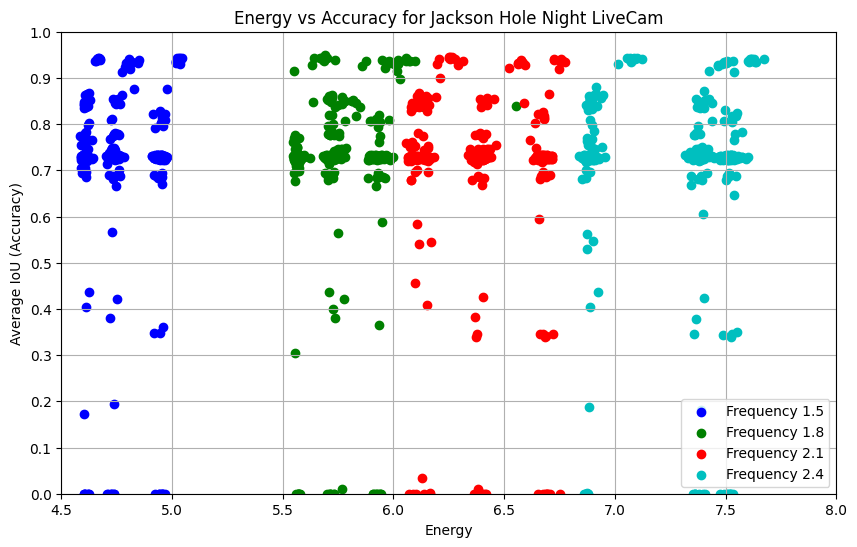

In [13]:
# JH NIGHT PROFILING

accuracy_df = pd.read_csv('accuracy-JH-night-1.csv')  # File containing "Average IoU"
energy_files = ['energy-JH-night-1.csv']  # Energy files

# Merge all energy files into one DataFrame
energy_df = pd.concat([pd.read_csv(f) for f in energy_files], ignore_index=True)

# Merge the accuracy and energy data on common columns
merged_df = pd.merge(accuracy_df, energy_df, on=["Frequency", "Filter", "Threshold", "Frame Bitrate"])
merged_df = merged_df.drop(columns=['FPS', 'Start Time', 'End Time'])

# Plotting
plt.figure(figsize=(10, 6))
# plt.scatter(merged_df['Avg Energy'], merged_df['Average IoU'], color='b', label='Energy vs Accuracy')

colors = ['b', 'g', 'r', 'c']  # Adjust/add more colors if needed

# Plot each frequency as a different color
for i, (frequency, group) in enumerate(merged_df.groupby('Frequency')):
    plt.scatter(group['Avg Energy'], group['Average IoU'], color=colors[i % len(colors)], label=f'Frequency {frequency}')

plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim(4.5, 8)

# Labels and title
plt.xlabel('Energy')
plt.ylabel('Average IoU (Accuracy)')
plt.title('Energy vs Accuracy for Jackson Hole Night LiveCam')

# Add grid and show the plot
plt.grid(True)
plt.legend()
plt.show()

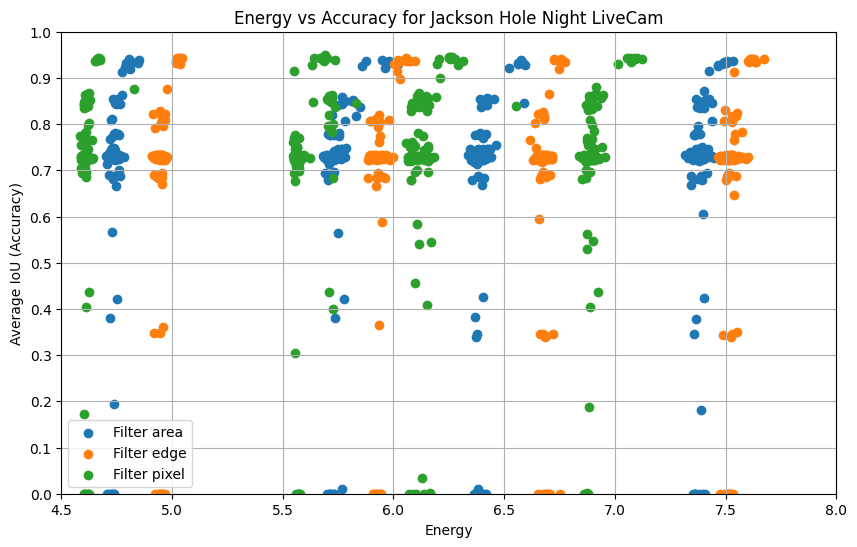

In [14]:
plt.figure(figsize=(10, 6))

for i, (frequency, group) in enumerate(merged_df.groupby('Filter')):
    plt.scatter(group['Avg Energy'], group['Average IoU'], label=f'Filter {frequency}')

plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim(4.5, 8)

# Labels and title
plt.xlabel('Energy')
plt.ylabel('Average IoU (Accuracy)')
plt.title('Energy vs Accuracy for Jackson Hole Night LiveCam')

# Add grid and show the plot
plt.grid(True)
plt.legend()
plt.show()

In [15]:
config_thresh_df = pd.DataFrame(columns=['Frequency', 'Filter', 'Threshold', 'Frame Bitrate', 'Avg Energy', 'Average IoU', 'Accuracy Threshold'])

for thresh in np.arange(0.70, 0.91, 0.01):
    lowest_energy_configuration = get_lowest_energy_configuration_for_accuracy(merged_df, thresh)
    if lowest_energy_configuration is None:
        continue
    lowest_energy_configuration['Accuracy Threshold'] = thresh
    config_thresh_df.loc[-1] = lowest_energy_configuration
    config_thresh_df.index = config_thresh_df.index + 1

config_thresh_df

,Frequency,Filter,Threshold,Frame Bitrate,Avg Energy,Average IoU,Accuracy Threshold
21,1.5,pixel,0.03,3000,4.586802,0.7743,0.7
20,1.5,pixel,0.03,3000,4.586802,0.7743,0.71
19,1.5,pixel,0.03,3000,4.586802,0.7743,0.72
18,1.5,pixel,0.03,3000,4.586802,0.7743,0.73
17,1.5,pixel,0.03,3000,4.586802,0.7743,0.74
16,1.5,pixel,0.03,3000,4.586802,0.7743,0.75
15,1.5,pixel,0.03,3000,4.586802,0.7743,0.76
14,1.5,pixel,0.03,3000,4.586802,0.7743,0.77
13,1.5,pixel,0.01,400,4.600765,0.8353,0.78
12,1.5,pixel,0.01,400,4.600765,0.8353,0.79


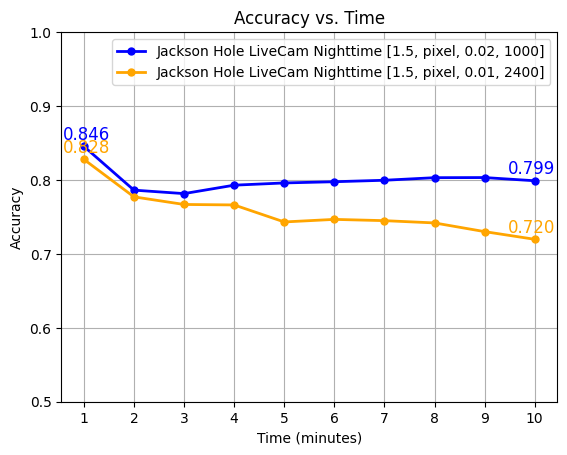

In [16]:
# Plot video accuracy over time for 1.5,pixel,0.01,2400

minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

JH_night_acc_001_2400 = [0.8455221957321224, 0.7862449206114603, 0.7815367469529282, 0.7929426997156662,
                     0.7959642506903178, 0.7976121231102627, 0.7996023964743009, 0.8030795972141606,
                     0.8032506414126193, 0.798926530919022]

# Plotting
plt.figure()
plt.plot(minutes, JH_night_acc_001_2400, marker='o', color='b', linestyle='-', linewidth=2, markersize=5, label='Jackson Hole LiveCam Nighttime [1.5, pixel, 0.02, 1000]')
plt.plot(minutes, JH_night_acc_002_1000, marker='o', color='orange', linestyle='-', linewidth=2, markersize=5, label='Jackson Hole LiveCam Nighttime [1.5, pixel, 0.01, 2400]')
plt.title('Accuracy vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.grid(True)
plt.xticks(minutes)  # Display minute intervals for clarity

plt.annotate(f"{JH_night_acc_001_2400[-1]:.3f}", (10, JH_night_acc_001_2400[-1]), textcoords="offset points", xytext=(-2,5), ha='center', fontsize=12, color='b')
plt.annotate(f"{JH_night_acc_001_2400[0]:.3f}", (1, JH_night_acc_001_2400[0]), textcoords="offset points", xytext=(2,5), ha='center', fontsize=12, color='b')

plt.annotate(f"{JH_night_acc_002_1000[-1]:.3f}", (10, JH_night_acc_002_1000[-1]), textcoords="offset points", xytext=(-2,5), ha='center', fontsize=12, color='orange')
plt.annotate(f"{JH_night_acc_002_1000[0]:.3f}", (1, JH_night_acc_002_1000[0]), textcoords="offset points", xytext=(2,5), ha='center', fontsize=12, color='orange')

plt.legend()
plt.show()